https://www.hackersrealm.net/post/detect-and-remove-outliers-python

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns

In [54]:
df = pd.read_csv('../dados/winequality.csv')

In [55]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [56]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


<Axes: xlabel='residual sugar', ylabel='Count'>

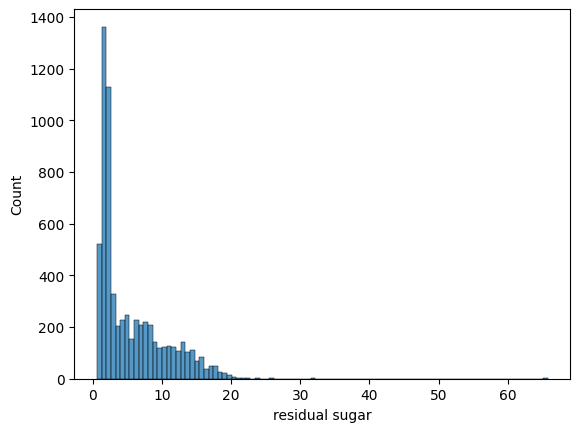

In [57]:
sns.histplot(df['residual sugar'])

<Axes: xlabel='residual sugar', ylabel='Count'>

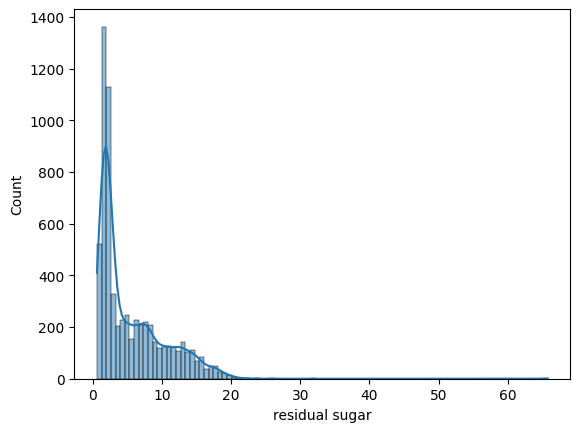

In [58]:
sns.histplot(df['residual sugar'], kde=True)

<Axes: >

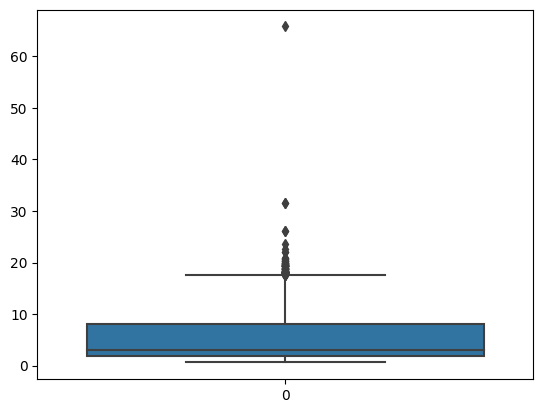

In [59]:
sns.boxplot(df['residual sugar'])

In [68]:
# find the limits
upper_limit = df['residual sugar'].mean() + 3*df['residual sugar'].std()
lower_limit = df['residual sugar'].mean() - 3*df['residual sugar'].std()
print('upper limit:', upper_limit)
print('lower limit:', lower_limit)

upper limit: 19.718700632945
lower limit: -8.830047823091265


In [78]:
# trimming - delete the outlier data
new_df = df[(df['residual sugar'] <= upper_limit) & (df['residual sugar'] >= lower_limit)].reset_index()
print('before removing outliers:', len(df))
print('after removing outliers:',len(new_df))
print('outliers:', len(df)-len(new_df))

before removing outliers: 6497
after removing outliers: 6469
outliers: 28


In [79]:
new_df

,index,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
1,2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
2,3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
3,4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,5,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6464,6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6465,6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6466,6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6467,6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [80]:
new_df.dtypes

index                     int64
type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [81]:
new_df['residual sugar'].tolist

<bound method IndexOpsMixin.tolist of 0       1.6
1       6.9
2       8.5
3       8.5
4       6.9
       ... 
6464    2.0
6465    2.2
6466    2.3
6467    2.0
6468    3.6
Name: residual sugar, Length: 6469, dtype: float64>

<Axes: >

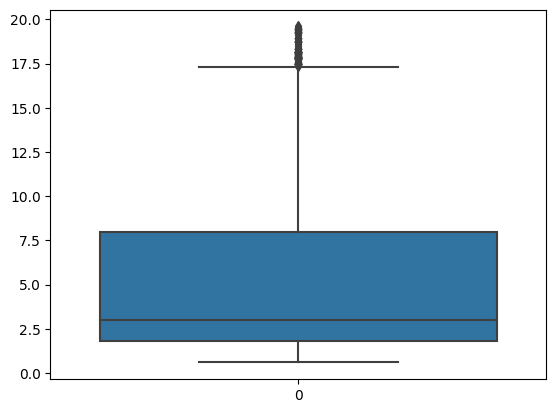

In [83]:
sns.boxplot(new_df['residual sugar'])

In [84]:
q1 = df['residual sugar'].quantile(0.25)
q3 = df['residual sugar'].quantile(0.75)
iqr = q3-q1

In [85]:
q1, q3, iqr

(1.8, 8.1, 6.3)

In [86]:
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)
lower_limit, upper_limit

(-7.6499999999999995, 17.549999999999997)

<Axes: >

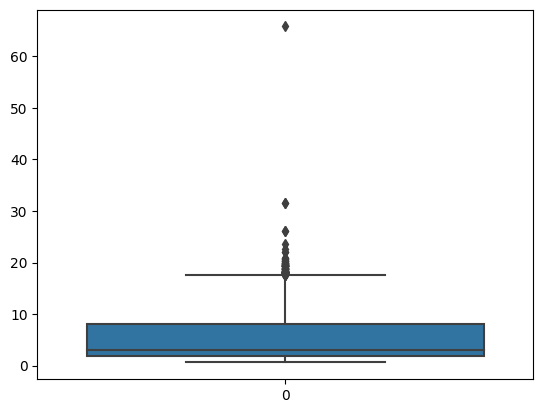

In [87]:
sns.boxplot(df['residual sugar'])

In [88]:
# find the outliers
df.loc[(df['residual sugar'] > upper_limit) | (df['residual sugar'] < lower_limit)]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.80,6
7,white,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.80,6
14,white,8.3,0.420,0.62,19.25,0.040,41.0,172.0,1.00020,2.98,0.67,9.70,5
38,white,7.3,0.240,0.39,17.95,0.057,45.0,149.0,0.99990,3.21,0.36,8.60,5
39,white,7.3,0.240,0.39,17.95,0.057,45.0,149.0,0.99990,3.21,0.36,8.60,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4691,white,6.9,0.190,0.31,19.25,0.043,38.0,167.0,0.99954,2.93,0.52,9.10,7
4694,white,6.9,0.190,0.31,19.25,0.043,38.0,167.0,0.99954,2.93,0.52,9.10,7
4748,white,6.1,0.340,0.24,18.35,0.050,33.0,184.0,0.99943,3.12,0.61,9.30,5
4749,white,6.2,0.350,0.25,18.40,0.051,28.0,182.0,0.99946,3.13,0.62,9.30,6


In [91]:
# trimming - delete the outlier data
new_df = df.loc[(df['residual sugar'] <= upper_limit) & (df['residual sugar'] >= lower_limit)].reset_index()
print('before removing outliers:', len(df))
print('after removing outliers:',len(new_df))
print('outliers:', len(df)-len(new_df))

before removing outliers: 6497
after removing outliers: 6377
outliers: 120


<Axes: >

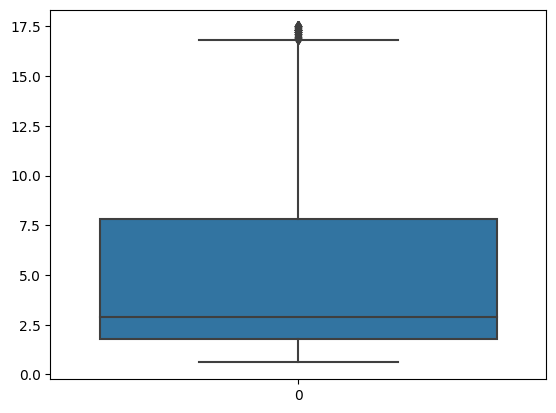

In [92]:
sns.boxplot(new_df['residual sugar'])

In [93]:
# capping - change the outlier values to upper (or) lower limit values
new_df = df.copy()
new_df.loc[(new_df['residual sugar']>upper_limit), 'residual sugar'] = upper_limit
new_df.loc[(new_df['residual sugar']<lower_limit), 'residual sugar'] = lower_limit

<Axes: >

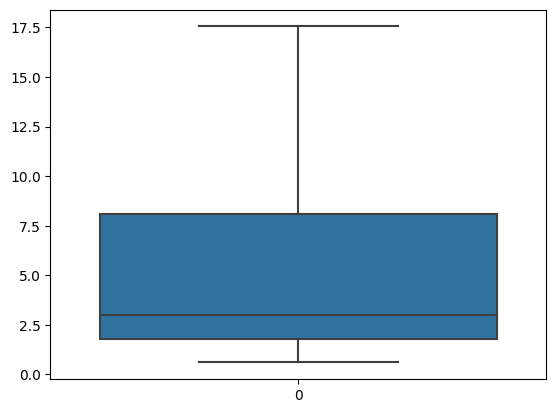

In [94]:
sns.boxplot(new_df['residual sugar'])

C:\Users\Luan Lima\AppData\Local\Temp\ipykernel_9740\107078400.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['residual sugar'])


<Axes: xlabel='residual sugar', ylabel='Density'>

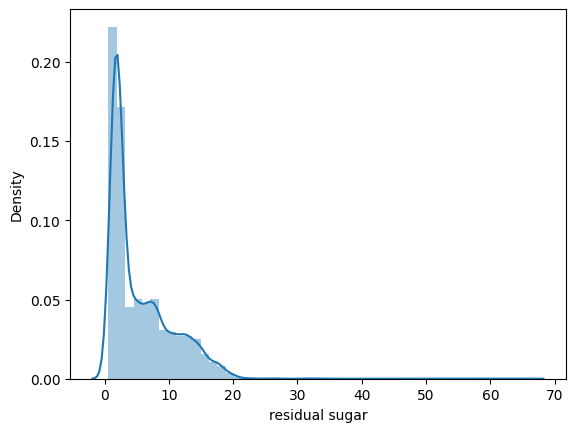

In [95]:
sns.distplot(df['residual sugar'])

C:\Users\Luan Lima\AppData\Local\Temp\ipykernel_9740\3242240098.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['residual sugar'])


<Axes: xlabel='residual sugar', ylabel='Density'>

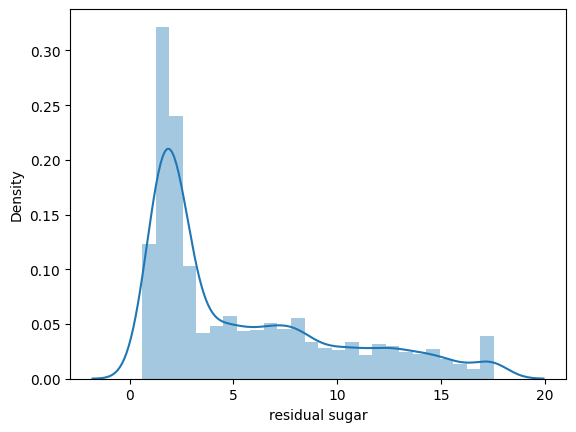

In [96]:
sns.distplot(new_df['residual sugar'])